# Project Overview
   
1. The US Student loan debts have reached a whopping $1.6 Trillion and continue growing exponentially as more and more students apply for Federal aids and grants. The student loans have crossed the total amounts of auto loans and credit card loans! The student debt crisis has caught the attention of a lot of top bureaucrats including President Trump, Elizabeth Warren, and Bernie Sanders. This resulted in Elizabeth Warren introduced a bill titled the "Student Loan Debt Relief Act of 2019." The bill stated a plan that would cancel student loan debt for more than 95% of borrowers, and would entirely cancel student loan debt for more than 75% of Americans with student loan debt.

    The population of interest is undergraduate and graduate students of US educational institutions who avail education loans. As the sampling is random and has enough observations the results of this study could be generalized for the population of interest.


2. These data provide insights into the performance of institutions that receive federal financial aid dollars, and the outcomes of the students of those institutions.


3. We have taken data over past 10 years from 2007 till 2017 and we will perform analysis on 10 data files. Each file has around 2000 columns. Hence we have analysed significance of each column and removed ones which we won't need for analysis.


# Dataset Description:

A large portion of the data is collected from The College Scorecard website while other crucial information is gathered from the federal financial aid and earnings website (US Department of Education) and data.gov. This data provides insights into the performance of schools eligible to receive federal financial aid. There are 7804 records available in total but as the data has missing, invalid or null values, it requires to be cleansed and processed to be streamlined to necessary information. The files include data from the year 1996 through 2017 for all degree-granting institutions of higher education but we will be using data from 2007 to 2017 to form inferences from 10 years of data. 


# Research Questions

1) What is the student debt amount per year in the United States? Can we see considerable growth?

2) Which state has the highest average student debt? 

3) Does the institution a student graduate from effect the loan repayment rate because of the income earned after graduating? 

4) What are the changes observed on the loan repayment rate after earning for 10 years?

5) Does an income group affect the choice made about taking an education loan ?


##  Steps in data acquisition and cleaning:

We had datasets of each year with 1977 columns and approx. 7000 rows in each. 

From the 1977 columns we shortlisted 280 columns which were of interest to us for our analysis.

We had a data dictionary with the datasets to help us choose our columns.

After choosing the columns, we imported the datasets into pandas dataframes.

We removed the columns having more null values than useful information. We extracted null columns from each dataset and made a dictionary with the count of each null column.

After saving that null column list and found unique columns out of it. Then we have removed those unique null columns from all the 10 dataframes we created earlier.

In [56]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Acquisition and Cleaning

In [57]:
#Loading all data frames into our python notebook

data78 = pd.read_csv('data1.csv', low_memory=False)
data89 = pd.read_csv('data2.csv', low_memory=False)
data910 = pd.read_csv('data3.csv', low_memory=False)
data1011 = pd.read_csv('data4.csv', low_memory=False)
data1112 = pd.read_csv('data5.csv', low_memory=False)
data1213 = pd.read_csv('data6.csv', low_memory=False)
data1314 = pd.read_csv('data7.csv', low_memory=False)
data1415 = pd.read_csv('data8.csv', low_memory=False)
data1516 = pd.read_csv('data9.csv', low_memory=False)
data1617 = pd.read_csv('data10.csv', low_memory=False)

In [58]:
#loading column dictionary 
# we have manually checked columns out of 2000 columns which we will be using for the analysis
cnames=pd.read_csv('c_name.csv')

#taking our column names from the dictionary and converting it to a list

c_list=cnames['column name'].values.tolist()

#Extracting all the column names that we require

def select_columns(df):
    df = df[[c for c in df.columns if c in c_list]]
    return df

data1 = select_columns(data78)
data2 = select_columns(data89)
data3 = select_columns(data910)
data4 = select_columns(data1011)
data5 = select_columns(data1112)
data6 = select_columns(data1213)
data7 = select_columns(data1314)
data8 = select_columns(data1415)
data9 = select_columns(data1516)
data10 = select_columns(data1617)

#Creating a list of column names with more number of null values across entire data set. 

list_null_col= []

def create_null_list(df):
    df_na= df.isna()
    count_true=0
    count_false=0
    for c in c_list:
#     print(c)
        col= list(df_na[c])
        for r in col:
            if r == True:
                count_true+=1
    #             print(count_true)
            else:
                count_false+=1
        if count_true >= count_false:
            list_null_col.append(c)     #List with all columns with more number of null values
            
            
list_df=[data1,data2,data3,data4,data5,data6,data7,data8,data9,data10]
for x in list_df:
    create_null_list(x)

#Converting list into a numpy array to find unique column names, then converting it back to a list

arr_null_col=np.array(list_null_col)
list_null_col_unique=list(np.unique(arr_null_col))
(list_null_col_unique)

#Creating a dictionary of all the repeated columns and the no. of times the are repeated.

d_null_col_count={}
for col in list_null_col_unique:
    d_null_col_count[col]=list_null_col.count(col)
d_null_col_count


final_na_col_list= []
keys= list(d_null_col_count.keys())
for k in keys:
    if d_null_col_count[k] != 1:
        final_na_col_list.append(k)
(final_na_col_list)   # final list with columns having null values present in multiple dataframes


#Dropping columns will null values in multiple dataframes

for x in final_na_col_list:
    c_list.remove(x)
    

## Analysis 1.1

##### What is the student debt amount per year in the United States? Can we see considerable growth?


In [59]:
# Making a list of all our cleaned files

list_files = ['data78.csv', 'data89.csv','data910.csv','data1011.csv', 'data1112.csv', 'data1213.csv', 'data1314.csv', 'data1415.csv','data1516.csv'
             ,'data1617.csv']


In [60]:
#Defining a function to accept each dataframe and find the total debt in the united states per year

def yr_debt_us(f):
    dic_yr = {}
    df_year = pd.read_csv(f)
# Tidying up data. Converting categorical variables to numerical variables.
    df_year['GRAD_DEBT_MDN'] = np.where(df_year['GRAD_DEBT_MDN']=='PrivacySuppressed',0,df_year['GRAD_DEBT_MDN'] )
    df_year['GRAD_DEBT_MDN'] = pd.to_numeric(df_year['GRAD_DEBT_MDN'], errors='coerce')
    df_year['GRAD_DEBT_MDN']= df_year['GRAD_DEBT_MDN'].replace(0,df_year['GRAD_DEBT_MDN'].mean())
    df_year['WDRAW_DEBT_MDN'] = np.where(df_year['WDRAW_DEBT_MDN']=='PrivacySuppressed',0,df_year['WDRAW_DEBT_MDN'] )
    df_year['WDRAW_DEBT_MDN'] = pd.to_numeric(df_year['WDRAW_DEBT_MDN'], errors='coerce')
    df_year['WDRAW_DEBT_MDN']= df_year['WDRAW_DEBT_MDN'].replace(0,df_year['WDRAW_DEBT_MDN'].mean())
    df_year['Total_of_Mean_Debt'] = df_year['GRAD_DEBT_MDN'] + df_year['WDRAW_DEBT_MDN']
    dic_yr[f] = df_year['Total_of_Mean_Debt'].sum()
#     print(dic_us)
    return dic_yr

In [61]:
dic_us = {} # rename all variables
for i in list_files:
    dic_us.update(yr_debt_us(i))

df_us = pd.DataFrame(dic_us, index = [0])
df_us = df_us.T
# df_us.reset_index(inplace = True)
df_us['year']= ['2007-08','2008-09','2009-10','2010-11','2011-12','2012-13', '2013-14','2014-15','2015-16','2016-17']
df_us.rename(columns={0:'Debt_VT', 'index' : 'Year'})
df_us.set_index('year', inplace=True)
df_us

,0
year,
2007-08,9.633744e+07
2008-09,1.077743e+08
2009-10,1.251299e+08
2010-11,1.376551e+08
2011-12,1.491576e+08
2012-13,1.593858e+08
2013-14,1.657031e+08
2014-15,1.664879e+08
2015-16,1.664330e+08


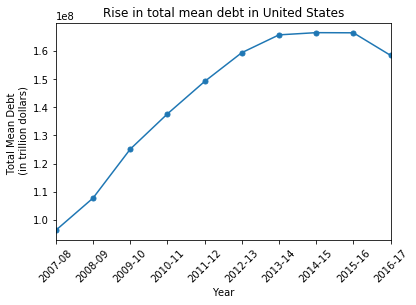

In [62]:
# df_us.set_index('year', inplace= True)

ax = df_us.plot( marker='.', markersize= 10)

ax.set(xlabel="Year", ylabel="Total Mean Debt \n (in trillion dollars)", title= 'Rise in total mean debt in United States')
ax.get_legend().remove()
plt.xticks(rotation=45)
fig_name='Rise in total mean debt in United States'
plt.savefig(fig_name) 

## Interpretation

We observe that the mean debt amount has risen steadily from less than a trillion dollars and rosen to nearly 2 trillion dollars over a period of 10 years. 

The amount reached a maximum of $1.7 trillion in the period 2014-2016.

After 2016 the amount reduced a bit to $1.6 trillion and currently is stagnant at that figure.

## Analysis 1.2

##### Which state has the highest average student debt? 

In [63]:
# We conduct an intermediary analysis to find out the state with the maximum debt each year.

def max_state_debt(f):
    df1 = pd.read_csv(f)
    df1 = df1[['INSTNM', 'CITY','STABBR','LATITUDE','LONGITUDE','GRAD_DEBT_MDN','WDRAW_DEBT_MDN']]
    columns = {'UNITID':'ID','INSTNM':'Institution_Name', 'CITY':'City','STABBR':'State','ZIP':'Zip','PREDDEG':'Degrees_awarded','CONTROL':'Ownership','PPTUG_EF':'Part_Time_Share','NPT4_PUB':'Avg_net_price_public','NPT4_PRIV': 'Avg_net_price_pvt','PCTFLOAN': 'Loan_rate','RPY_3YR_RT_SUPP': 'Repay_rate','MD_EARN_WNE_P10': 'Earning_after_10','COSTT4_A':'Cost of attendance'}
    df1.rename(columns = columns, inplace = True)
    df1['GRAD_DEBT_MDN'] =np.where(df1['GRAD_DEBT_MDN']=='PrivacySuppressed',0,df1['GRAD_DEBT_MDN'] )
    df1['GRAD_DEBT_MDN'] = pd.to_numeric(df1['GRAD_DEBT_MDN'], errors='coerce')
    df1['GRAD_DEBT_MDN']=df1['GRAD_DEBT_MDN'].replace(0,df1['GRAD_DEBT_MDN'].mean())
    df1['WDRAW_DEBT_MDN'] =np.where(df1['WDRAW_DEBT_MDN']=='PrivacySuppressed',0,df1['WDRAW_DEBT_MDN'] )
    df1['WDRAW_DEBT_MDN'] = pd.to_numeric(df1['WDRAW_DEBT_MDN'], errors='coerce')
    df1['WDRAW_DEBT_MDN']=df1['WDRAW_DEBT_MDN'].replace(0,df1['WDRAW_DEBT_MDN'].mean())
    df1['Total_of_Mean_Debt'] = df1['GRAD_DEBT_MDN'] + df1['WDRAW_DEBT_MDN']
    tmp = pd.DataFrame(df1.groupby(['State']).mean()['Total_of_Mean_Debt'])
    tmp.reset_index(inplace = True)
    tmp = pd.DataFrame(tmp.sort_values(by = 'Total_of_Mean_Debt', ascending= False).head(1))
    return tmp

In [64]:
df_conc = pd.DataFrame()
for i in list_files:
    df_conc_tmp = max_state_debt(i)
#     print(df_conc_tmp)
    df_conc= pd.concat([df_conc,df_conc_tmp])

df_remove = pd.DataFrame(df_conc['State'].value_counts()) # dataframe not needed here

In [65]:
df_conc # top row 

,State,Total_of_Mean_Debt
8,DC,18027.125278
8,DC,19468.040851
54,VT,21415.930927
54,VT,23592.731444
54,VT,24626.049669
54,VT,25736.960160
54,VT,26455.774922
54,VT,26648.136626
8,DC,27878.940959
8,DC,28278.475114


The state of Vermont had maximum loan debt for 6 out of 10 years. It is safe to assume that vermont is the state with highest student loan debt.

In [66]:
# Defining a function to calculate the total debt in the state of vermont each year.

def VT_state_debt(f):
    dic_vt = {}
    df_year = pd.read_csv(f)
#     df1 = df1[['INSTNM', 'CITY','STABBR','LATITUDE','LONGITUDE','GRAD_DEBT_MDN','WDRAW_DEBT_MDN']]
    columns = {'UNITID':'ID','INSTNM':'Institution_Name', 'CITY':'City','STABBR':'State','ZIP':'Zip','PREDDEG':'Degrees_awarded','CONTROL':'Ownership','PPTUG_EF':'Part_Time_Share','NPT4_PUB':'Avg_net_price_public','NPT4_PRIV': 'Avg_net_price_pvt','PCTFLOAN': 'Loan_rate','RPY_3YR_RT_SUPP': 'Repay_rate','MD_EARN_WNE_P10': 'Earning_after_10','COSTT4_A':'Cost of attendance'}
    df_year.rename(columns = columns, inplace = True)
    df_year['GRAD_DEBT_MDN'] =np.where(df_year['GRAD_DEBT_MDN']=='PrivacySuppressed',0,df_year['GRAD_DEBT_MDN'] )
    df_year['GRAD_DEBT_MDN'] = pd.to_numeric(df_year['GRAD_DEBT_MDN'], errors='coerce')
    df_year['GRAD_DEBT_MDN']=df_year['GRAD_DEBT_MDN'].replace(0,df_year['GRAD_DEBT_MDN'].mean())
    df_year['WDRAW_DEBT_MDN'] =np.where(df_year['WDRAW_DEBT_MDN']=='PrivacySuppressed',0,df_year['WDRAW_DEBT_MDN'] )
    df_year['WDRAW_DEBT_MDN'] = pd.to_numeric(df_year['WDRAW_DEBT_MDN'], errors='coerce')
    df_year['WDRAW_DEBT_MDN']=df_year['WDRAW_DEBT_MDN'].replace(0,df_year['WDRAW_DEBT_MDN'].mean())
    df_year['Total_of_Mean_Debt'] = df_year['GRAD_DEBT_MDN'] + df_year['WDRAW_DEBT_MDN']
    st_grp = df_year.groupby(['State'])
    dic_vt[f] = st_grp.get_group('VT').mean()['Total_of_Mean_Debt']
    print(dic_vt)
    return dic_vt

In [67]:
m = {}
for i in list_files:
    m.update(VT_state_debt(i))
   

{'data78.csv': 17187.243229935997}
{'data89.csv': 18877.685626577368}
{'data910.csv': 21415.930927421257}
{'data1011.csv': 23592.731444359448}
{'data1112.csv': 24626.049668691794}
{'data1213.csv': 25736.96015950815}
{'data1314.csv': 26455.774922194345}
{'data1415.csv': 26648.13662633783}
{'data1516.csv': 27178.762285336852}
{'data1617.csv': 27919.71803381778}


In [68]:
df_vt = pd.DataFrame(m, index = [0])
df_vt = df_vt.T
df_vt.reset_index(inplace = True)
df_vt.rename(columns={0:'Debt_VT', 'index' : 'Year'})
df_vt['year']= ['2007-08','2008-09','2009-10','2010-11','2011-12','2012-13', '2013-14','2014-15','2015-16','2016-17']
df_vt.set_index('year', inplace= True)
df_vt.drop(['index'], axis=1, inplace=True)
df_vt

,0
year,
2007-08,17187.243230
2008-09,18877.685627
2009-10,21415.930927
2010-11,23592.731444
2011-12,24626.049669
2012-13,25736.960160
2013-14,26455.774922
2014-15,26648.136626
2015-16,27178.762285


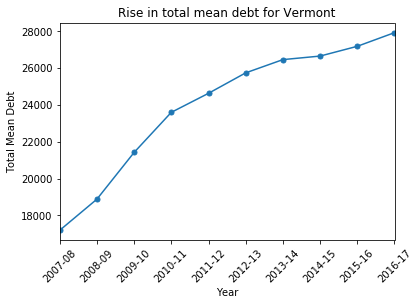

In [69]:
ax = df_vt.plot(marker='.', markersize= 10)

ax.set(xlabel="Year", ylabel="Total Mean Debt", title='Rise in total mean debt for Vermont')
ax.get_legend().remove()

plt.xticks(rotation=45)

plt.savefig(fig_name) 

## Interpretation:

We calculated the highest mean debt by state in each year and then over a period of 10 years identified which state had the highest mean debt amount viz. Vermont.

We then calculated the mean debt amount in the state of Vermont over a span of 10 years from 2007 to 2017. The time series plotted above tells us that the mean debt amount has increased considerably year after year.

In [70]:
#Importing data from the latest year

df = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv')

In [71]:
df_reg = df[['UNITID', 'INSTNM','CITY','STABBR','ZIP','PREDDEG','CONTROL', 'PPTUG_EF','NPT4_PUB','NPT4_PRIV','PCTFLOAN','RPY_3YR_RT_SUPP','COSTT4_A','MD_EARN_WNE_P10']]

columns = {'UNITID':'ID','INSTNM':'Institution_Name', 'CITY':'City','STABBR':'State','ZIP':'Zip','PREDDEG':'Degrees_awarded','CONTROL':'Ownership','PPTUG_EF':'Part_Time_Share','NPT4_PUB':'Avg_net_price_public','NPT4_PRIV': 'Avg_net_price_pvt','PCTFLOAN': 'Loan_rate','RPY_3YR_RT_SUPP': 'Repay_rate','MD_EARN_WNE_P10': 'Earning_after_10','COSTT4_A':'Cost of attendance'}
df_reg.rename(columns = columns, inplace = True)

In [72]:
# CLeaning and tidying data 

#Replacing null values with mean of the column

df_reg['Repay_rate'] =np.where(df_reg['Repay_rate']=='PrivacySuppressed',0,df_reg['Repay_rate'])
df_reg['Repay_rate'] = pd.to_numeric(df_reg['Repay_rate'], errors='coerce')

df_reg['Earning_after_10'] = pd.to_numeric(df_reg['Earning_after_10'], errors='coerce')
df_reg['Earning_after_10'].fillna(df_reg['Earning_after_10'].mean(), inplace=True)

df_reg=df_reg.loc[df_reg['Repay_rate'].notna()]
df_reg=df_reg.loc[df_reg['Cost of attendance'].notna()]

#Converting categorical variables in Ownership Column 

df_reg['Ownership'] = np.where(df_reg['Ownership'] == 1, 'Public', (np.where(df_reg['Ownership'] == 2, 'Private non profit', 'Private for profit')))

In [73]:
#Getting mean values grouped by different types of institutions

df_stat = pd.DataFrame(df_reg.groupby(by ='Ownership').mean())
df_stat [['Repay_rate','Cost of attendance','Earning_after_10']]
df_stat.reset_index(inplace = True)
df_stat.set_index('Ownership', inplace = True)
# df_sta.astype
df_stat

,ID,Degrees_awarded,Part_Time_Share,Avg_net_price_public,Avg_net_price_pvt,Loan_rate,Repay_rate,Cost of attendance,Earning_after_10
Ownership,,,,,,,,,
Private for profit,341792.510870,1.989130,0.245091,NaN,21532.067029,0.690848,0.329052,26813.875000,32716.256424
Private non profit,207968.170047,2.803432,0.132591,NaN,22671.545242,0.592199,0.559325,40321.587363,42284.296050
Public,192945.395427,2.218561,0.367663,10241.474109,NaN,0.317155,0.468017,16054.455279,36314.643522


In [74]:
# df_stat2 = df_stat[['Repay_rate','Cost of attendance', 'Earning_after_10']]
df_stat

,ID,Degrees_awarded,Part_Time_Share,Avg_net_price_public,Avg_net_price_pvt,Loan_rate,Repay_rate,Cost of attendance,Earning_after_10
Ownership,,,,,,,,,
Private for profit,341792.510870,1.989130,0.245091,NaN,21532.067029,0.690848,0.329052,26813.875000,32716.256424
Private non profit,207968.170047,2.803432,0.132591,NaN,22671.545242,0.592199,0.559325,40321.587363,42284.296050
Public,192945.395427,2.218561,0.367663,10241.474109,NaN,0.317155,0.468017,16054.455279,36314.643522


## Interpretation: 

As per the statistical analysis performed above, we can see that the best repayment rate can be observed by Private non profit institutions which is approximately 55.93%. Further, we explore which type of instituition has what repayment rate. 

In [75]:
df_new=df_reg.copy()
df_new['Repay_rate']=df_reg['Repay_rate']*100
df_new.head()

,ID,Institution_Name,City,State,Zip,Degrees_awarded,Ownership,Part_Time_Share,Avg_net_price_public,Avg_net_price_pvt,Loan_rate,Repay_rate,Cost of attendance,Earning_after_10
0,100654,Alabama A & M University,Normal,AL,35762,3,Public,0.0655,15184.0,NaN,0.7697,25.315543,22886.0,31000.0
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,3,Public,0.2515,17535.0,NaN,0.5207,51.396316,24129.0,41200.0
2,100690,Amridge University,Montgomery,AL,36117-3553,3,Private non profit,0.5435,NaN,9649.0,0.8741,23.076923,15080.0,39600.0
3,100706,University of Alabama in Huntsville,Huntsville,AL,35899,3,Public,0.1496,19986.0,NaN,0.4278,54.850903,22108.0,46700.0
4,100724,Alabama State University,Montgomery,AL,36104-0271,3,Public,0.0771,12874.0,NaN,0.7690,21.858675,19413.0,27700.0


## Analysis 2

In [76]:
x1 = (df_new[df_new['Ownership'] == 'Private for profit']['Repay_rate'])
x2 = (df_new[df_new['Ownership'] == 'Private non profit']['Repay_rate'])
x3 = (df_new[df_new['Ownership'] == 'Public']['Repay_rate'])

Text(0.5, 0.98, 'Repayment rate vs No. of instituitions')

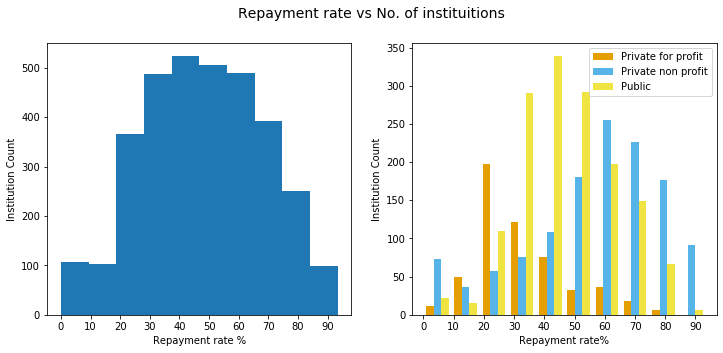

In [77]:
colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Private for profit', 'Private non profit', 'Public']

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
# plt.axis([0,90,0,200])
plt.hist([x1, x2, x3], bins = 10,color = colors, label=names)
plt.xlabel('Repayment rate%')
plt.xticks(np.arange(0,100,10))
plt.ylabel('Institution Count')
plt.legend()

plt.subplot(1, 2, 1)
ax=(df_new['Repay_rate']).plot.hist(xticks = np.arange(0,100,10), bins=10)
ax.set_xlabel("Repayment rate %")
ax.set_ylabel("Institution Count")
# plt.tight_layout()
# f.figsize(15,15)

from pylab import *
fig = gcf()
fig.suptitle("Repayment rate vs No. of instituitions", fontsize=14)


## Interpretation:
3 year repayment rate : It is the fraction of students who were able to make a payment towards their loan repayment amount in the duration of 3 years from the time they entered repayment cycle. 

1. Majority of the private for profit instituitions have a repayment rate of only 20% which means that a large majority of students studying at for profit institutions have difficulty in repaying their debts.

2. The repayment rate of public universities is a smooth normal curve with mean at around 40%. This means that a major fraction of students enrolled at public universities are not able to pay of their debts. 

3. This is a problematic situation wherein students from maximum number of institutions have not been able to contribute to their loan repayment due to possible reasons such as unemployment, insufficient funds, not enough return on investment etc.


Conclusion: The repayment rate at private non profit instituitions is the best amongst the three with a mean if 60% which shows us that a major fraction of students are able to repay their debts. 

## Analysis 3

##### Does the institution a student graduate from effect the loan repayment rate because of the income earned after graduating? 
##### What are the changes observed on the loan repayment rate after earning for 10 years?


In [78]:
import plotly.express as px
fig = px.scatter(df_reg, x= 'Cost of attendance', y= 'Earning_after_10' , hover_name = 'Institution_Name', color='Ownership',title = 'Cost VS Returns',width=800, height=400)
fig.update_xaxes(range=[0,80000])
fig.update_yaxes(range=[0,150000])
fig.show()

# Interpretation
From the scatterplot it can be seen that the cost of attendance for all the types of institutions vary majorly, something that can be confimed with the statistical analysis performed above. The cost of attendance is highest for Private non-profit institutions and their earnings seem to be spread over a wider range, thereby posessing high variance with respect to earnings. Certain outliers can be seen to exist in this case.

The second highest cost of attendance appears to be for Private for profit institutions with their earnings over a period of 10 years lying close to each other in terms of variance. 

The lowest cost of attendance can be observed for Public institutions, which is very low compared to the cost of attendance associated with Priate non profit institutes. However, from the scatter plot it can be observed that the earnings from this investment is comparitive to the earnings received by gradautes from the Private non profit institutions. This goes to consolidate the high rate of repayment we observed in our statistical analysis above for Public institutions.

When we observe the outliers, we notice the universities 'St. Louis College of Pharmacy' and 'Albany College of Pharmacy' give the best rate of returns after a period of 10 years. We can generalize this by saying that the pharmaceutical universities provide the best ROI.

Another intresting outlier is the public univeristy 'United States Merchant Marine Academy' which gives you the returns as high as Harvard and Stanford but at nearly 1/4th the price.

This answers our question whether the instituition that a student graduates from affects the loan repayment rate because of the income earned after graduating.

## Analysis 4

### Hypothesis Testing

Null hypothesis:The type of institution has no remarkable effect on the repayment rate observed after 3 years.

Alternate hypothesis: The repayment rate of private for-profit institutions are different than repayment rate of all institutions.


In [79]:
import statsmodels.api as sm

X = pd.get_dummies(df_reg['Ownership'], prefix_sep='=', drop_first=True)
X = sm.add_constant(X)
y = df_reg['Repay_rate'].dropna()

model = sm.OLS(endog=y, exog=X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Repay_rate   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     294.4
Date:                Tue, 10 Dec 2019   Prob (F-statistic):          1.93e-118
Time:                        04:38:55   Log-Likelihood:                 836.14
No. Observations:                3321   AIC:                            -1666.
Df Residuals:                    3318   BIC:                            -1648.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3291      0.008     41.079      0.000       0.313       0.345
Private non profit     0.2303      0.010     24.035      0.000       0.211       0.249
Public                 0.1390      0.009     14.815      0.000       0.121       0.157
==============================================================================
Omnibus:                      149.133   Durbin-Watson:                   1.537
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.756
Skew:                          -0.490   Prob(JB):                     1.53e-39
Kurtosis:                       3.576   Cond. No.                         5.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inference:

From the linear model we can see that the institution type is a significant independent variable that affects the value of the dependent variable considered here, which is Repayment Rate. The base/ reference institute type here is Private for-profit. The inference from the regression model we can say that:

On average, the repayment rate for Private Non Profit institute is 23.03% greater than the repayment rate observed for Private For Profit institute.
On average, the repayment rate for Public institute is 13.9% greater than the repayment rate observed for Private For Profit institute.

Hence, we can conclude that we reject our null hypthesis.
The type of institution has effects on the repayment rate observed from these institutes. 

In [80]:
#Adding a new column 'year' to each dataframe

df1 = pd.read_csv("data78.csv")
df1['Year'] = '2007-08'

df2 = pd.read_csv("data89.csv")
df2['Year'] = '2008-09'

df3 = pd.read_csv("data910.csv")
df3['Year'] = '2009-10'

df4 = pd.read_csv("data1011.csv")
df4['Year'] = '2010-11'

df5 = pd.read_csv("data1112.csv")
df5['Year'] = '2011-12'

df6 = pd.read_csv("data1213.csv")
df6['Year'] = '2012-13'

df7 = pd.read_csv("data1314.csv")
df7['Year'] = '2013-14'

df8 = pd.read_csv("data1415.csv")
df8['Year'] = '2014-15'

df9 = pd.read_csv("data1516.csv")
df9['Year'] = '2015-16'

df10 = pd.read_csv("data1617.csv")
df10['Year'] = '2016-17'

## Analysis 5

In [81]:
#Merging all the dataframes together

df_all = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10], axis=0, ignore_index=True)
df_all_yr = df_all.loc[:, df_all.isnull().mean() <= .1]
tmp_df= df_all_yr.copy()
gender_df= df_all_yr.groupby(by='Year').mean()[['UGDS_MEN','UGDS_WOMEN']]*100
gender_df= df_all_yr.groupby(by='STABBR').mean()[['UGDS_MEN','UGDS_WOMEN']]*100

In [82]:
gender_df

,UGDS_MEN,UGDS_WOMEN
STABBR,,
AK,40.492637,59.507473
AL,37.272509,62.727503
AR,30.567795,69.432241
AS,36.966000,63.034000
AZ,35.129425,64.870617
CA,36.454126,63.358187
CO,34.138079,65.511070
CT,34.988749,64.117430
DC,35.317314,64.682686


In [83]:
gender_df = gender_df.round({'UGDS_MEN': 2, 'UGDS_WOMEN': 2})

gender_df['text'] = 'Vs Men %' + gender_df['UGDS_MEN'].astype(str)

import plotly.graph_objects as go
# gender_df['text']=gender_df['UGDS_MEN'] +'<br>'+ gender_df['UGDS_WOMEN']

fig = go.Figure(data=go.Choropleth(
    locations=gender_df.index, # Spatial coordinates
#     z = gender_df['UGDS_MEN'].astype(float),
    z = gender_df['UGDS_WOMEN'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    text = gender_df['text'], # hover text
#     text = 'Men Grad rate' + '<br>' + gender_df['UGDS_MEN'],
    marker_line_color='black',
    colorbar_title = " Women Percentage",
))

fig.update_layout(
    title_text = "Women's Graduation rate",
    geo_scope='usa', # limite map scope to USA
)

fig.show()

## Interpretation:

In the above heatmap, we compare the graduation rate of females vs males. According to our dataset, the state of Idaho has the highest female graduation rate. 

## Analysis 6

##### Does an income group affect the choice made about taking an education loan ?


In [84]:
#df_Ln_In is dataframe of loan per income range for all 10 years
df_Ln_In = df_all_yr [['DEP_INC_PCT_M1','DEP_INC_PCT_M2','DEP_INC_PCT_H1','DEP_INC_PCT_H2','Year']]

#Cleaning data
df_Ln_In.loc[df_Ln_In.DEP_INC_PCT_M1 == 'PrivacySuppressed', 'DEP_INC_PCT_M1'] = 0
df_Ln_In.loc[df_Ln_In.DEP_INC_PCT_M2 == 'PrivacySuppressed', 'DEP_INC_PCT_M2'] = 0
df_Ln_In.loc[df_Ln_In.DEP_INC_PCT_H1 == 'PrivacySuppressed', 'DEP_INC_PCT_H1'] = 0
df_Ln_In.loc[df_Ln_In.DEP_INC_PCT_H2 == 'PrivacySuppressed', 'DEP_INC_PCT_H2'] = 0

df_Ln_In['DEP_INC_PCT_M1'] = df_Ln_In['DEP_INC_PCT_M1'].apply(pd.to_numeric, errors='coerce')
df_Ln_In['DEP_INC_PCT_M2'] = df_Ln_In['DEP_INC_PCT_M2'].apply(pd.to_numeric, errors='coerce')
df_Ln_In['DEP_INC_PCT_H1'] = df_Ln_In['DEP_INC_PCT_H1'].apply(pd.to_numeric, errors='coerce')
df_Ln_In['DEP_INC_PCT_H2'] = df_Ln_In['DEP_INC_PCT_H2'].apply(pd.to_numeric, errors='coerce')

df_Ln_In = df_Ln_In.drop(df_Ln_In[(df_Ln_In['DEP_INC_PCT_M1'] == 0) & (df_Ln_In.DEP_INC_PCT_M2 == 0) & (df_Ln_In.DEP_INC_PCT_H1 ==0) & (df_Ln_In.DEP_INC_PCT_H2 == 0)].index)
# df_Ln_In = df_Ln_In.drop(df_Ln_In[(df_Ln_In.DEP_INC_PCT_M1 < 50) & (df_Ln_In.DEP_INC_PCT_M2 > 20)].index)

#renaming columns
df_Ln_In.rename(columns={"DEP_INC_PCT_M1": "Low class", "DEP_INC_PCT_M2": "Lower middle","DEP_INC_PCT_H1":"Upper Middle"
                  ,"DEP_INC_PCT_H2":"High class"}, inplace = True)

results = df_Ln_In.groupby(by='Year').agg({'Low class': ['mean'], 
                                            'Lower middle': ['mean'],
                                          'Upper Middle':['mean'],
                                          'High class':['mean']})* 100
results


,Low class,Lower middle,Upper Middle,High class
,mean,mean,mean,mean
Year,,,,
2007-08,16.800386,13.537749,8.538707,8.619477
2008-09,16.898039,13.518219,8.611733,8.874876
2009-10,17.271131,13.332237,8.171454,8.498139
2010-11,17.696151,13.125454,7.483378,7.740348
2011-12,17.756659,12.737320,6.841092,7.076838
2012-13,17.108161,12.249173,6.611213,6.750671
2013-14,16.680652,11.914403,6.290736,6.465079
2014-15,16.757520,11.915809,6.098077,6.368201


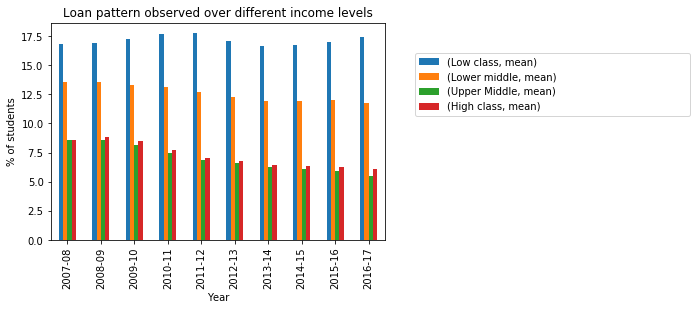

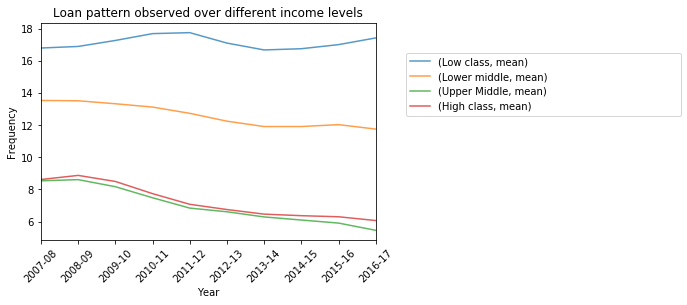

In [85]:
ax=results.plot.bar()# title dependent students taken loan lables and legend  figure 
ax.set_xlabel("Year")
ax.set_ylabel("% of students")
ax.set_title('Loan pattern observed over different income levels')
ax.legend(bbox_to_anchor=(1, 1, 1, 0), loc=2, ncol=1, mode="expand", borderaxespad=3)

ax=results.plot(kind='line',alpha=0.75, rot=45) ## add label to the graph
ax.set_xlabel("Year")
ax.set_ylabel("Frequency")
ax.set_title('Loan pattern observed over different income levels')
ax.legend(bbox_to_anchor=(1, 1, 1, 0), loc=2, ncol=1, mode="expand", borderaxespad=3)

## Interpretation:

The lower income households take larger loans as comapred to the higher income households. What's intresting to note over here is how the no of loans taken by higher income households and upper middle income households have kept on reducing over the years while at the same time the loans taken by lower income households have kept on increasing. This shows high disparity between the median income of households.

As per our hypothesis testing, we know that private for-profit institutes and public institutes have low costs of attendance however their repayment rates are considerably lower than private non-profit institutes. Keeping income groups in mind, it can be assumed that students from low class and lower middle class will attend public or private for profit institutes. This inherently will result in lower repayment rates (as per hypothesis) for students graduating from private for-profit institutes as compared to students graduating from private non-profits. 

If this trend continues, it wont be surprising to see the disparity that exists between the 2 income groups to increase further. Hence, authorities should look into either reducing costs of attendance for private non-profit or  improve repayment rates for other institutes.

# Conclusion 

To sum it up, the above analysis done on the given sample data indicate that the student loan repayment rates of for-profit institutions are lower than student loan repayment rate of non-profit institutions. The explanatory analysis, hypothesis testing and the regression model agree with each other and strongly indicate that the loan repayment rate of for-profit institutes are lower than population. So, we could conclude that the student loan repayment rates of student from for-profit institutions are less than that of student from non for-profit institutions


The frequency of loans of lower income groups has shown a steady rise and will continue to do so if the income gap of the lower and higher income groups keeps worsening. 


The scatterplot in analysis 3 shows us that private non-profit instituitions have a better ROI than private for-profit instituitions.

To conclude, the student loan debt crisis is in a bad shape in the United States right now and it is necessary for the government to bring some reforms.